In [ ]:
from utils import config
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import joblib
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

params = config()
final_path = params['final']
clustered_path = params['clustered']
model_path = params['model']

df = pd.read_csv(final_path)
df.set_index('Unnamed: 0')

df = df.drop(['Unnamed: 0'],axis=1)
numeric_columns = df.select_dtypes(include='number').columns




In [115]:
num_x = df.select_dtypes(include='number')

# Scale numerical vars
scaler = StandardScaler()
x = scaler.fit_transform(num_x)


Text(0, 0.5, 'SSE')

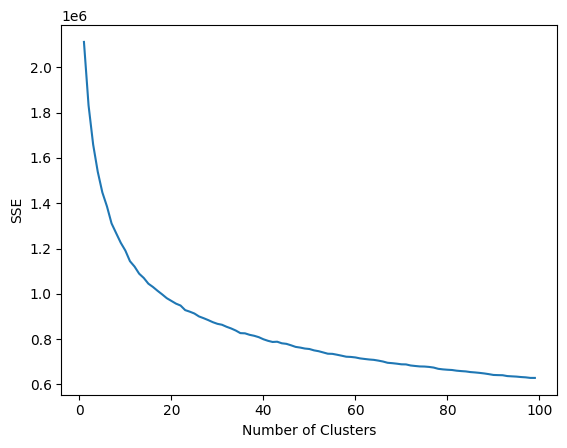

In [116]:
sse = []
clusters = 100
for k in range(1, clusters):
    kmeans = KMeans(
        init="random",
        n_clusters=k,
        n_init=10,
        max_iter=30,
        random_state=42
    )
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

ax = sns.lineplot(x=range(1, clusters), y=sse)
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("SSE")

In [ ]:
k = 40
kmeans = KMeans(
    init="random",
    n_clusters=k,
    random_state=42
)
km = kmeans.fit(x)
df['cluster'] = kmeans.predict(x)

df.to_csv(clustered_path)
joblib.dump(km, model_path)




['clustered.csv']

In [ ]:
sil = silhouette_score(X, labels)
ch = calinski_harabasz_score(X, labels)
db = davies_bouldin_score(X, labels)